<a href="https://colab.research.google.com/github/johannes-kk/am207/blob/master/exercises/06_monte_carlo_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY 6: Monte Carlo Integration


### AM207: Advanced Scientific Computing

#### Instructor: Weiwei Pan

#### Due: September 22nd, 11:59pm EST

**Names of Group Members**: Claire Tseng, ctseng@college.harvard.edu 
Johannes Kolberg, johanneskolberg@g.harvard.edu 
 claire yang: claireyang@g.harvard.edu
Nayantara Mudur  nmudur@g.harvard.edu 
 Rob Clark: roc4441@g.harvard.edu
Maria Guramare: mguramare@college.harvard.edu

## Learning Goals:

1. explore using MC methods for estimating arbitary definite integrals
2. explore the effects of variance reduction

### Load necessary libraries

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
# from autograd import scipy as sp
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

## Problem 1: Monte Carlo Estimation for Arbitrary Definite Integrals

We formulated Monte Carlo estimation as a way to approximate the expected value of functions of random variables. However, given a function of deterministic variables, $f(x)$, we can rewrite the integral

$$
\int_{\Omega} f(x) dx,
$$

where $x\in\mathbb{R}^D$ and $\Omega \subseteq \mathbb{R}^D$, like an expectation

$$
\int_{\Omega} f(x) dx = \int_{\Omega} g(x)h(x) dx,
$$

if we can factor $f$ as $f(x) = g(x)h(x)$.

The rewritten integral looks a lot like the expectation of $g(X)$ where the pdf of $X$ is $h(X)$. The only problem is that $h(x)$ is not necessarily a pdf!

#### **Rewriting an Arbitrary Definite Integral as an Expectation**

We want to rewrite the following expression as an expectation:
$$
\int_{\Omega} f(x) dx = \int_{\Omega} g(x)h(x) dx.
$$
Let $V$ denote the integral of $h$ over $\Omega$:
$$
V = \int_{\Omega} h(x)dx.
$$
Note that, then, $\int_{\Omega} \frac{1}{V}h(x)dx = 1$. Hence, $\frac{1}{V}h(x)$ is a valid pdf over $\Omega$. 

Then we can write:
$$
\int_{\Omega} f(x) dx = \int_{\Omega} \left(Vg(x)\right)\left(\frac{1}{V}h(x)\right)dx.
$$

We recognize the above integral as an expectation, and hence can estimated using Monte Carlo methods:
$$
\mathbb{E}_{X\sim \frac{1}{V}h(X)}[Vg(X)] \approx V\sum_{s=1}^S g(X_s),\; X_s\sim \frac{1}{V}h(X).
$$

#### **How Do You Factor the Integrand $f$?**

Once we factor $f(x)$ as $f(x) = g(x)h(x)$, then we can rewrite the integral of $f$ (over $\Omega$) as an expectation

$$
\int_{\Omega} f(x) dx = \int_{\Omega} \left(Vg(x)\right)\left(\frac{1}{V}h(x)\right)dx = \mathbb{E}_{X\sim \frac{1}{V}h(X)}[Vg(X)].
$$

But how does one choose $g$ and $h$? Two simple things to keep in mind:
1. since we need to sample from $h$, we need to choose $h$ such that it is easily approximated by distributions from which we know how to sample.
2. since the variance of the Monte Carlo estimator depends on $g$, we should choose $g$ to be relatively flat (so that the output of $g$ has low variance).

**Exercise 1:** 
Use Monte Carlo methods to estimate the following integral:

$$
\int_{0}^{1} \frac{3x^2}{x^3 - x^2 - 11x - 4} dx
$$

Check the variance of your estimate.

**Hint:** write the integrand $f$ as $f(x) = g(x)h(x)$ where $h(x)$ can easily be turned into a pdf over $[0, 1]$ and is easy to sample from using inverse CDF sampling.

**Answer:**\
pick $$g(x)= \frac{3x^2}{x^3 - x^2 - 11x - 4}$$ and $$h(x) \sim U(0,1)$$

In [ ]:
import numpy as np
import math
N = 500
num_trials = 50
estimates = []

def g(x):
  return 3*x**2 / (np.power(x, 3) - np.power(x, 2) - 11*x - 4)

for i in range(num_trials):
  # sample from h(x) aka the unif on [0, 1]
  unif_samples = np.random.uniform(0, 1, N)
  # plug back into g(x)
  samples = [g(samp) for samp in unif_samples]
  estimates.append(sum(samples) / N)

# var of estimates
var = np.var(estimates)
print("Variance:", var)
print("Estimates:", estimates)

Variance: 9.498756214554126e-06
Estimates: [-0.08246545698463288, -0.09029256056059035, -0.08593128285873554, -0.08692019430682696, -0.08734073872038718, -0.08908157588074114, -0.08553194738476327, -0.0853420985671333, -0.07962494876716213, -0.08727020318244774, -0.08657789740172105, -0.07996728342124254, -0.08661924186528176, -0.08650614818595388, -0.0850581764316311, -0.0894594681598139, -0.08146419375023194, -0.08173886092677783, -0.0839361538650503, -0.08297924541017876, -0.08317807777324779, -0.08433373903263884, -0.0842163782237518, -0.08274766430471484, -0.0824544891879061, -0.08543129002448598, -0.08241587455046226, -0.08274102982826272, -0.08032006726855229, -0.08253485856581268, -0.0830365050795758, -0.08408321179649071, -0.08534188543409124, -0.08040852633551045, -0.08018237680064332, -0.08782801670914563, -0.08113411190294874, -0.07994025417011645, -0.08081142751305155, -0.08687801800853642, -0.08057243179547259, -0.07893120023600697, -0.09012187437421099, -0.07717688386971

now pick $$h(x) = 3x^2$$
Integrate between 0 & 1:
$$\int_{0}^{1} 3x^2 dx = [x^3]_0^1 = 1$$ 
--> valid pdf

In [ ]:
N = 500
num_trials = 50
estimates = []

def g1(x):
  return 1.0/ (np.power(x, 3) - np.power(x, 2) - 11*x - 4)

def inv_cdf(x):
  return np.power(x, 1.0/3.0)

for i in range(num_trials):
  # sample from h(x) aka the unif on [0, 1]
  unif_samples = np.random.uniform(0, 1, N)
  h_samp = inv_cdf(unif_samples)
  # plug back into g(x)
  samples = [g1(samp) for samp in h_samp]
  estimates.append(sum(samples)/N)

print(np.var(estimates))
print("Estimates:", estimates)

6.204059551815128e-07
Estimates: [-0.08386926459308354, -0.08373020870808391, -0.08327884872046619, -0.08444741911774896, -0.08478089763816396, -0.08416249979959811, -0.0844405987013292, -0.08606562972960324, -0.08513255805838262, -0.08491244125018599, -0.085216569703978, -0.08439620325530707, -0.08514706466158903, -0.0839974291880017, -0.08341865158846247, -0.08323272087512035, -0.08578727793143578, -0.08492574860338996, -0.08391719775318937, -0.08391763262239815, -0.08415941102016414, -0.08407736970664113, -0.0839857671131863, -0.08445090479262152, -0.08461670547433031, -0.08341605255460445, -0.08393652858126283, -0.08381734803053174, -0.08362397246921352, -0.08411297427091045, -0.08352887583844835, -0.08364054905759674, -0.08340088283185204, -0.08375945108309651, -0.0827732551544629, -0.08517636918289843, -0.08305482861902647, -0.08458734049532278, -0.08471495807163386, -0.08480883982209597, -0.08307718596831368, -0.08516831185237045, -0.08250582998800839, -0.08382313877408991, -0.0

In this problem, we factor $f(x)$ into $g(x)h(x)$. This allows us to treat the integral as an expected value for which we have Monte Carlo sampling techniques to approximate the integral.

Certain factorizations are better than others because they reduce the variance of our estimate. Choosing $h(x) \sim U(0,1)$ means we approximate the integral by drawing samples from a uniform distribution, which has equal mass across the domain. We compare that to an approximation that samples from $h(x) = 3x^2$ which has higher mass near x=1, samples more from this area of the domain, which reduces variance in the estimates.

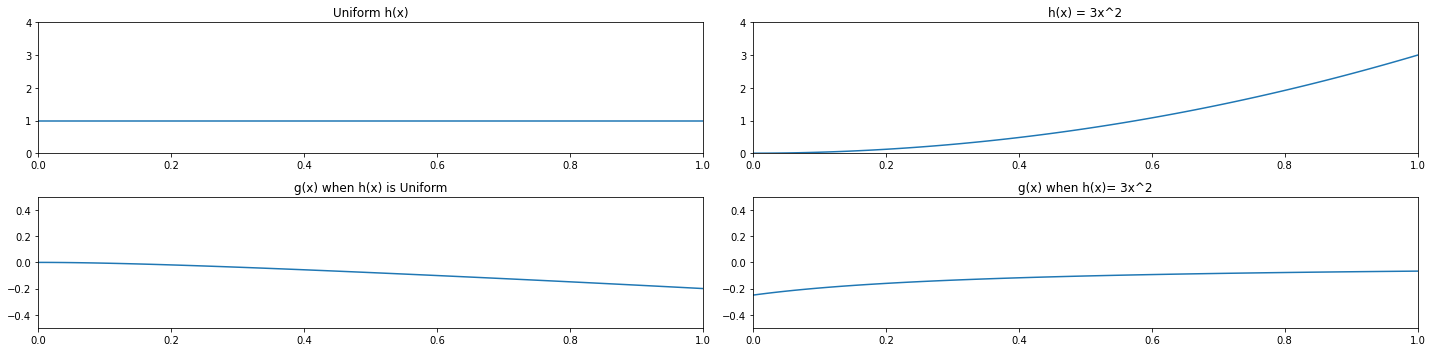

In [ ]:
uniform = sp.stats.uniform(loc=0,scale=1).pdf
x = np.linspace(0,1,100)

g1 = 3*x**2/(x**3 - x**2 - 11*x - 4)

h2 = 3*x**2
g2 = 1/(x**3 - x**2 - 11*x - 4)

fig, ax = plt.subplots(2, 2, figsize=(20, 5))
ax[0,0].plot(x,uniform(x))
ax[0,0].set_title('Uniform h(x)')
ax[0,0].set_xlim(0,1)
ax[0,0].set_ylim(0,4)
ax[0,1].plot(x,h2)
ax[0,1].set_title('h(x) = 3x^2')
ax[0,1].set_xlim(0,1)
ax[0,1].set_ylim(0,4)
ax[1,0].plot(x,g1)
ax[1,0].set_title('g(x) when h(x) is Uniform')
ax[1,0].set_xlim(0,1)
ax[1,0].set_ylim(-0.5,0.5)
ax[1,1].plot(x,g2)
ax[1,1].set_title('g(x) when h(x)= 3x^2')
ax[1,1].set_xlim(0,1)
ax[1,1].set_ylim(-0.5,0.5)

fig.tight_layout()
plt.show() 


**Exercise 2:**  Implement importance sampling for variance reduction. Since $h$ is a distribution on $[0, 1]$, let's first consider a beta distribution as the importance distribution. Compare the variance of this estimator with the naive one in Exercise 1. Is the result what you expected? Why or why not (explictly diagnose the performance of your importance sampling estimate using the tools introduced in lecture)?

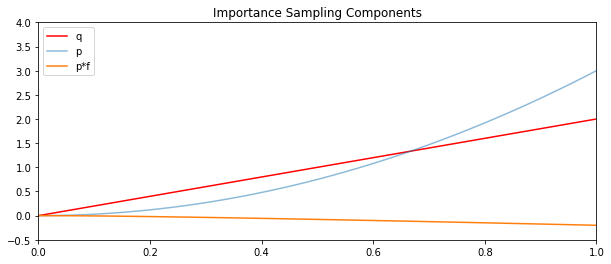

In [ ]:
a=2
b=1

beta = sp.stats.beta(a=a,b=b).pdf
x = np.linspace(0,1,100)

g1 = 3*x**2/(x**3 - x**2 - 11*x - 4)

h2 = 3*x**2
g2 = 1/(x**3 - x**2 - 11*x - 4)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(x,beta(x), label='q', c='red')
ax.plot(x,h2, label = 'p', alpha=0.5)
ax.plot(x,g1, label = 'p*f')
plt.title('Importance Sampling Components')
plt.legend(loc='best')
plt.xlim(0,1)
plt.ylim(-.5,4)
plt.show() 

In [ ]:
from scipy import stats
num_trials = 50
N = 500
is_ests = []
q_pdf = stats.beta(a=a, b=b).pdf
p_pdf = lambda x: 3*x**2

def g1_func(x): 
  return 1.0/ (np.power(x, 3) - np.power(x, 2) - 11*x - 4)

for i in range(num_trials):
  # sample from Beta (i.e. q)
  beta_samples = np.random.beta(a=a, b=b, size=N)
  
  # compute weights for each sample
  weights = np.array([p_pdf(x)/q_pdf(x) for x in beta_samples])

  # compute IS estimate
  is_ests.append((weights * g1_func(beta_samples)).mean())

print("Variance of IS estimates", np.var(is_ests))
print("Final ests:", is_ests)


Variance of IS estimates 6.727743729831384e-07
Final ests: [-0.08153301558407748, -0.0838358951692524, -0.08322218705637091, -0.08307206348222254, -0.08299737826692, -0.08305557866552715, -0.08467454748079663, -0.08337163638893745, -0.08488088357066172, -0.08398674334237392, -0.08386599899715541, -0.08358813922366508, -0.0833758105814207, -0.08452130298773512, -0.0844439048815928, -0.0831904368395023, -0.08421247632596736, -0.08474840420708732, -0.08397867091816333, -0.0846833643793936, -0.08266561467565978, -0.08435561598147058, -0.08305127521582624, -0.08288897255550194, -0.08549767371778674, -0.08426327523893448, -0.0842103543351337, -0.08464486659471586, -0.08416130682398507, -0.08347225844753722, -0.08429945830893665, -0.08532962196710227, -0.08432410111241816, -0.08432286147771037, -0.08505063681941143, -0.08424432425707531, -0.08438278196680395, -0.08395299666651115, -0.08217056517394483, -0.08450123366746567, -0.0837655493363805, -0.08367299245751884, -0.08439571029097774, -0.0

Now we try to improve our estimate by reducing the variance using importance sampling. We know the variance of the importance sampling estimate comes out to $\int_{0}^{1} f^2(x)p(x)\frac{p(x)}{q(x)}dx - I^2 $. We can make the variance small by choosing $q$ so that it is large when the magnitude of $f*p$ is large. With this in mind we have chosen $q \sim Beta(a=2,b=1)$, which is graphed with $f*p$ above. Still, we have not achieved much of a reduction in variance from the naive monte carlo estimate.

**Exercise 3:** Choose your own importance distribution for variance reduction. Argue why your importance distribution is appropriate for variance reduction -- connect your choice with theoretical properties of importance sampling.